In [ ]:
!pip install tensorflow.gpu==2.8.0

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image
import keras

In [ ]:
img_dir="/content/drive/MyDrive/Malaria Dataset"
img_size = 200
img_data =[]
label = []

In [ ]:
Parasitized = os.listdir(img_dir+'/Parasitized/')
for i, image_name in enumerate(Parasitized):
  if (image_name.split('.')[1]=='png'):
    image = cv2.imread(img_dir+'/Parasitized/'+image_name)
    image = Image.fromarray(image, 'RGB')
    image = image.resize((img_size,img_size)) 
    img_data.append(np.array(image))
    label.append(0)


In [ ]:
Uninfected = os.listdir(img_dir+'/Uninfected/')
for i, image_name in enumerate(Uninfected):
  if (image_name.split('.')[1]=='png'):
    image = cv2.imread(img_dir+'/Uninfected/'+image_name)
    image = Image.fromarray(image, 'RGB')
    image = image.resize((img_size,img_size)) 
    img_data.append(np.array(image))
    label.append(1)

In [ ]:
categories =['Uninfected', 'Parasitized']
for category in categories:
   path = os.path.join(img_dir, category)
   class_num = categories.index(category)

In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(img_data, to_categorical(np.array(label)), test_size=0.30, random_state=42)

In [ ]:
print(y_train.shape)

(19290, 2)


In [ ]:
num_classes = y_train.shape[1]

In [ ]:
print(num_classes)

2


In [ ]:
from keras import Sequential
from keras.layers import Flatten, Dense, Dropout, MaxPool2D,Conv2D
from keras.layers.normalization.batch_normalization import BatchNormalization

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(200,200,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.2))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.2))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))
model.compile(loss= 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 batch_normalization_8 (Batc  (None, 99, 99, 32)       128       
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 99, 99, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0

In [ ]:
history = model.fit(np.array(X_train), y_train, epochs=20, batch_size=64, verbose = 1, validation_split=0.2)

Epoch 1/20
242/242 [==============================] - 204s 836ms/step - loss: 1.4960 - accuracy: 0.6213 - val_loss: 0.7515 - val_accuracy: 0.5705
Epoch 2/20
242/242 [==============================] - 204s 845ms/step - loss: 0.6416 - accuracy: 0.6545 - val_loss: 0.6695 - val_accuracy: 0.5798
Epoch 3/20
242/242 [==============================] - 203s 840ms/step - loss: 0.6193 - accuracy: 0.6547 - val_loss: 1.1416 - val_accuracy: 0.5153
Epoch 4/20
242/242 [==============================] - 204s 841ms/step - loss: 0.6374 - accuracy: 0.6474 - val_loss: 0.6301 - val_accuracy: 0.6794
Epoch 5/20
242/242 [==============================] - 203s 841ms/step - loss: 0.5509 - accuracy: 0.6912 - val_loss: 0.8402 - val_accuracy: 0.6573
Epoch 6/20
242/242 [==============================] - 203s 840ms/step - loss: 0.5125 - accuracy: 0.7467 - val_loss: 0.7361 - val_accuracy: 0.5985
Epoch 7/20
242/242 [==============================] - 205s 845ms/step - loss: 0.4760 - accuracy: 0.7725 - val_loss: 0.7376 -

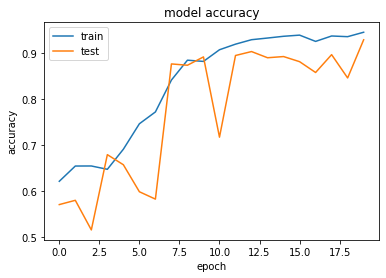

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

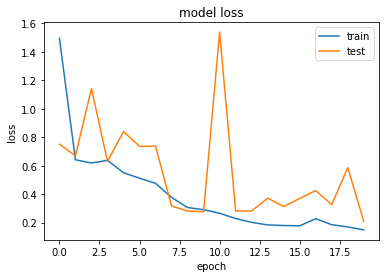

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
from sklearn.metrics import classification_report
preds = model.predict(np.array(X_test))
print(preds.shape)
preds = np.argmax(preds, axis=1)
print(preds.shape)

(8268, 2)
(8268,)


In [ ]:
y_true = np.argmax(y_test, axis=1)
print(y_test.shape)

(8268, 2)


In [ ]:
print(classification_report(y_true, preds, target_names=categories))

              precision    recall  f1-score   support

  Uninfected       0.98      0.88      0.93      4146
 Parasitized       0.89      0.98      0.94      4122

    accuracy                           0.93      8268
   macro avg       0.94      0.93      0.93      8268
weighted avg       0.94      0.93      0.93      8268



In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
y_score = model.predict(np.array(X_test))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

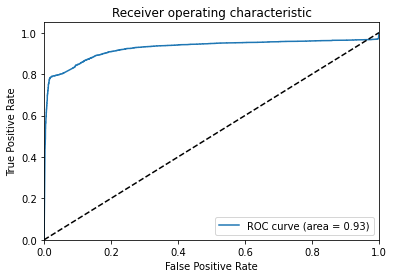

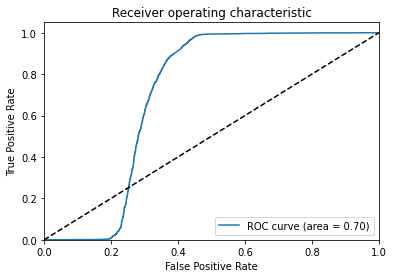

In [ ]:
for i in range(num_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

#Xception

In [ ]:
from tensorflow.keras.applications import Xception

base_model = Xception( weights='imagenet', input_shape=(200, 200, 3), include_top=False)  

In [ ]:
base_model.trainable = False

In [ ]:
from keras.layers import GlobalAveragePooling2D
from keras import Input, Model


In [ ]:
inputs = Input(shape=(200, 200, 3))
x = base_model(inputs, training=False)
x1 = GlobalAveragePooling2D()(x)
outputs = Dense(num_classes, activation='softmax')(x1)
xception_model = Model(inputs, outputs)

In [ ]:
xception_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 global_average_pooling2d_3   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_4 (Dense)             (None, 2)                 4098      
                                                                 
Total params: 20,865,578
Trainable params: 4,098
Non-trainable params: 20,861,480
_________________________________________________________________


In [ ]:
base_model.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 99, 99, 32)   864         ['input_6[0][0]']                
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 99, 99, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                                                                                           

In [ ]:
xception_model.compile(loss= 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = xception_model.fit(np.array(X_train), y_train, epochs=10, batch_size=64, verbose = 1, validation_split=0.2)

Epoch 1/10
242/242 [==============================] - 280s 1s/step - loss: 1.8060 - accuracy: 0.6584 - val_loss: 1.4051 - val_accuracy: 0.6195
Epoch 2/10
242/242 [==============================] - 287s 1s/step - loss: 0.9067 - accuracy: 0.7199 - val_loss: 2.1271 - val_accuracy: 0.6146
Epoch 3/10
242/242 [==============================] - 293s 1s/step - loss: 0.9071 - accuracy: 0.7385 - val_loss: 0.7862 - val_accuracy: 0.7439
Epoch 4/10
242/242 [==============================] - 293s 1s/step - loss: 0.6772 - accuracy: 0.7655 - val_loss: 2.4709 - val_accuracy: 0.6016
Epoch 5/10
242/242 [==============================] - 302s 1s/step - loss: 0.6662 - accuracy: 0.7766 - val_loss: 0.5067 - val_accuracy: 0.8097
Epoch 6/10
242/242 [==============================] - 302s 1s/step - loss: 0.5819 - accuracy: 0.7883 - val_loss: 0.8580 - val_accuracy: 0.6804
Epoch 7/10
242/242 [==============================] - 302s 1s/step - loss: 0.6336 - accuracy: 0.7763 - val_loss: 1.2621 - val_accuracy: 0.6960

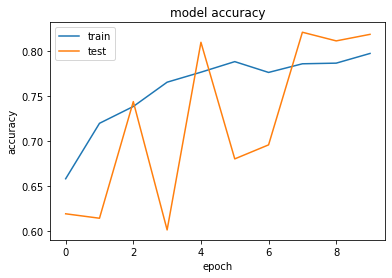

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

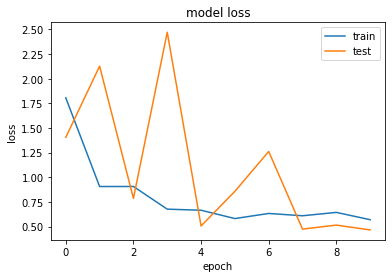

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
preds = xception_model.predict(np.array(X_test))
print(preds.shape)
preds = np.argmax(preds, axis=1)
print(preds.shape)

(8268, 2)
(8268,)


In [ ]:
y_true = np.argmax(y_test, axis=1)
print(y_test.shape)

(8268, 2)


In [ ]:
print(classification_report(y_true, preds, target_names=categories))

              precision    recall  f1-score   support

  Uninfected       0.80      0.85      0.83      4146
 Parasitized       0.84      0.78      0.81      4122

    accuracy                           0.82      8268
   macro avg       0.82      0.82      0.82      8268
weighted avg       0.82      0.82      0.82      8268



In [ ]:
y_score = xception_model.predict(np.array(X_test))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

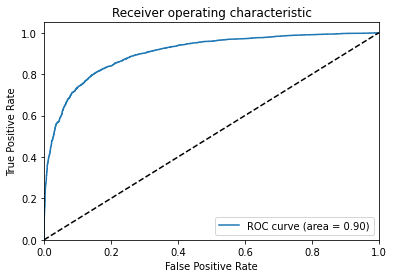

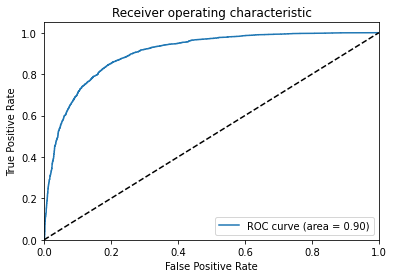

In [ ]:
for i in range(num_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

#VGG19

In [ ]:
from keras.layers import Input, Lambda
from keras.models import Model
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing import image
from keras.models import Sequential

In [ ]:
base_model = VGG19( weights='imagenet', input_shape=(200, 200, 3), include_top=False)

80150528/80134624 [==============================] - 0s 0us/step


In [ ]:
base_model.trainable = False

In [ ]:
x = Flatten()(base_model.output)

In [ ]:
prediction = Dense(num_classes, activation = 'softmax' )(x)

In [ ]:
vgg19_model = Model(inputs = base_model.input, outputs =prediction)

In [ ]:
vgg19_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0   

In [ ]:
vgg19_model.compile(loss= 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = vgg19_model.fit(np.array(X_train), y_train, epochs=20, batch_size=64, verbose = 1, validation_split=0.2)

Epoch 1/20
242/242 [==============================] - 632s 3s/step - loss: 1.8591 - accuracy: 0.8926 - val_loss: 1.0591 - val_accuracy: 0.9261
Epoch 2/20
242/242 [==============================] - 631s 3s/step - loss: 0.6933 - accuracy: 0.9441 - val_loss: 1.5394 - val_accuracy: 0.9088
Epoch 3/20
242/242 [==============================] - 632s 3s/step - loss: 0.5314 - accuracy: 0.9528 - val_loss: 1.0751 - val_accuracy: 0.9269
Epoch 4/20
242/242 [==============================] - 623s 3s/step - loss: 0.5359 - accuracy: 0.9559 - val_loss: 1.3059 - val_accuracy: 0.9241
Epoch 5/20
242/242 [==============================] - 542s 2s/step - loss: 0.4068 - accuracy: 0.9655 - val_loss: 1.4144 - val_accuracy: 0.9352
Epoch 6/20
242/242 [==============================] - 542s 2s/step - loss: 0.5742 - accuracy: 0.9618 - val_loss: 1.5085 - val_accuracy: 0.9228
Epoch 7/20
242/242 [==============================] - 541s 2s/step - loss: 0.5438 - accuracy: 0.9648 - val_loss: 1.7817 - val_accuracy: 0.9342

In [ ]:
preds = vgg19_model.predict(np.array(X_test))
print(preds.shape)
preds = np.argmax(preds, axis=1)
print(preds.shape)
y_true = np.argmax(y_test, axis=1)
print(y_test.shape)

(8268, 2)
(8268,)
(8268, 2)


In [ ]:
y_true = np.argmax(y_test, axis=1)
print(y_test.shape)

(8268, 2)


In [ ]:
print(classification_report(y_true, preds, target_names=categories))

              precision    recall  f1-score   support

  Uninfected       0.92      0.96      0.94      4146
 Parasitized       0.96      0.91      0.93      4122

    accuracy                           0.94      8268
   macro avg       0.94      0.94      0.94      8268
weighted avg       0.94      0.94      0.94      8268



In [ ]:
y_score = vgg19_model.predict(np.array(X_test))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

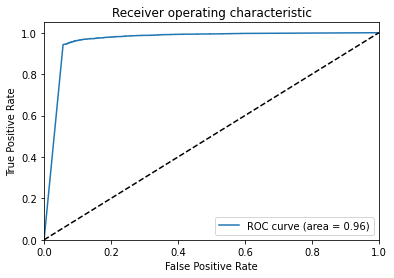

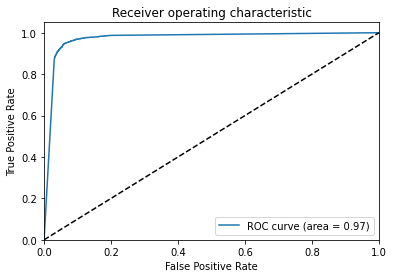

In [ ]:
for i in range(num_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

#ResNet50

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

In [ ]:
R_base_model = ResNet50( weights='imagenet', input_shape=(200, 200, 3), include_top=False)

In [ ]:
R_base_model.trainable = False

In [ ]:
x = Flatten()(R_base_model.output)

In [ ]:
prediction = Dense(num_classes, activation = 'softmax' )(x)

In [ ]:
ResNet50_model = Model(inputs = R_base_model.input, outputs =prediction)

In [ ]:
ResNet50_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 206, 206, 3)  0           ['input_5[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 100, 100, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [ ]:
ResNet50_model.compile(loss= 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = ResNet50_model.fit(np.array(X_train), y_train, epochs=20, batch_size=64, verbose = 1, validation_split=0.2)

Epoch 1/20
242/242 [==============================] - 234s 956ms/step - loss: 1.9061 - accuracy: 0.8784 - val_loss: 0.8625 - val_accuracy: 0.9033
Epoch 2/20
242/242 [==============================] - 256s 1s/step - loss: 0.4185 - accuracy: 0.9428 - val_loss: 0.7298 - val_accuracy: 0.9199
Epoch 3/20
242/242 [==============================] - 309s 1s/step - loss: 0.3145 - accuracy: 0.9543 - val_loss: 1.3314 - val_accuracy: 0.8867
Epoch 4/20
242/242 [==============================] - 311s 1s/step - loss: 0.2130 - accuracy: 0.9671 - val_loss: 1.7354 - val_accuracy: 0.8730
Epoch 5/20
242/242 [==============================] - 314s 1s/step - loss: 0.2556 - accuracy: 0.9682 - val_loss: 1.0875 - val_accuracy: 0.9259
Epoch 6/20
242/242 [==============================] - 312s 1s/step - loss: 0.1623 - accuracy: 0.9785 - val_loss: 0.9956 - val_accuracy: 0.9352
Epoch 7/20
242/242 [==============================] - 312s 1s/step - loss: 0.1408 - accuracy: 0.9810 - val_loss: 1.4076 - val_accuracy: 0.9

In [ ]:
preds = ResNet50_model.predict(np.array(X_test))
print(preds.shape)
preds = np.argmax(preds, axis=1)
print(preds.shape)
y_true = np.argmax(y_test, axis=1)
print(y_test.shape)

(8268, 2)
(8268,)
(8268, 2)


In [ ]:
y_true = np.argmax(y_test, axis=1)
print(y_test.shape)

(8268, 2)


In [ ]:
print(classification_report(y_true, preds, target_names=categories))

              precision    recall  f1-score   support

  Uninfected       0.94      0.94      0.94      4146
 Parasitized       0.94      0.94      0.94      4122

    accuracy                           0.94      8268
   macro avg       0.94      0.94      0.94      8268
weighted avg       0.94      0.94      0.94      8268



In [ ]:
y_score = ResNet50_model.predict(np.array(X_test))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

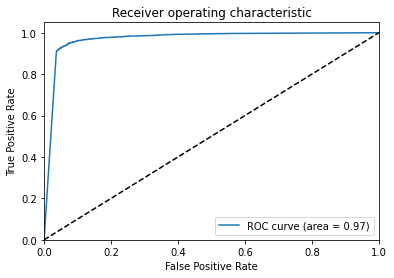

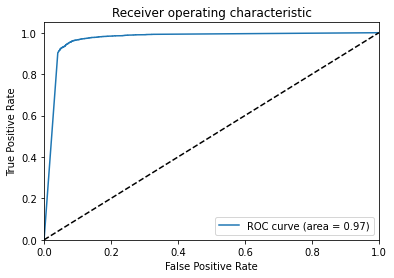

In [ ]:
for i in range(num_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

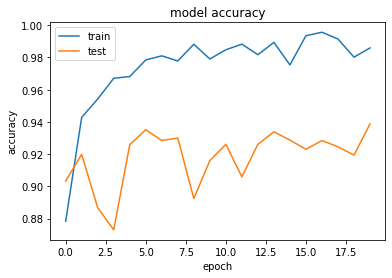

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

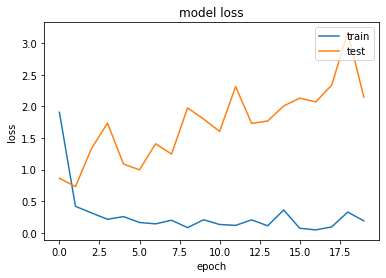

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()